# Importing Libraries 

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor 
from sklearn.metrics import r2_score

# Reading the Dataset

In [75]:
data = pd.read_csv("https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv")

In [76]:
df = data.copy()

# Exploratory Data Analytics

In [77]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [78]:
df.shape

(301, 9)

In [79]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [81]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [82]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [83]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [84]:
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

* Calculating how old a car is, by using the feature Year

In [85]:
df['Current_Year'] = 2022

In [86]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [87]:
df['No_of_years']=df['Current_Year']-df['Year']

In [88]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


* Dropping off irrelevant columns

In [89]:
df.drop(columns=['Car_Name','Year','Current_Year'],inplace=True)

In [90]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


* Converting categorical values of Fuel_Type, Seller_Type and Transmission into Int type

In [91]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [92]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [93]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

Observation : Since only 2 datapoints record Fuel_Type as CNG, we can remove the dummy label Fuel_Type_CNG

In [94]:
df = pd.get_dummies(df)

In [95]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,8,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,9,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,5,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,11,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,8,0,1,0,1,0,0,1


In [96]:
df.drop(columns=['Fuel_Type_CNG'],inplace=True)

In [97]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No_of_years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Dealer',
       'Seller_Type_Individual', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

* Finding correleation between the attributes of the dataset, where target is Selling_Price

In [98]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,0.550724,-0.550724,0.367128,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,0.512030,-0.512030,0.348715,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,0.101419,-0.101419,0.162510,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,-0.124269,0.124269,0.050316,-0.050316
No_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,-0.039896,0.039896,0.000394,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,0.350467,-0.350467,0.098643,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,-0.358321,0.358321,-0.091013,0.091013
Seller_Type_Dealer,0.550724,0.512030,0.101419,-0.124269,-0.039896,0.350467,-0.358321,1.000000,-1.000000,0.063240,-0.063240
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,-1.000000,1.000000,-0.063240,0.063240
Transmission_Automatic,0.367128,0.348715,0.162510,0.050316,0.000394,0.098643,-0.091013,0.063240,-0.063240,1.000000,-1.000000


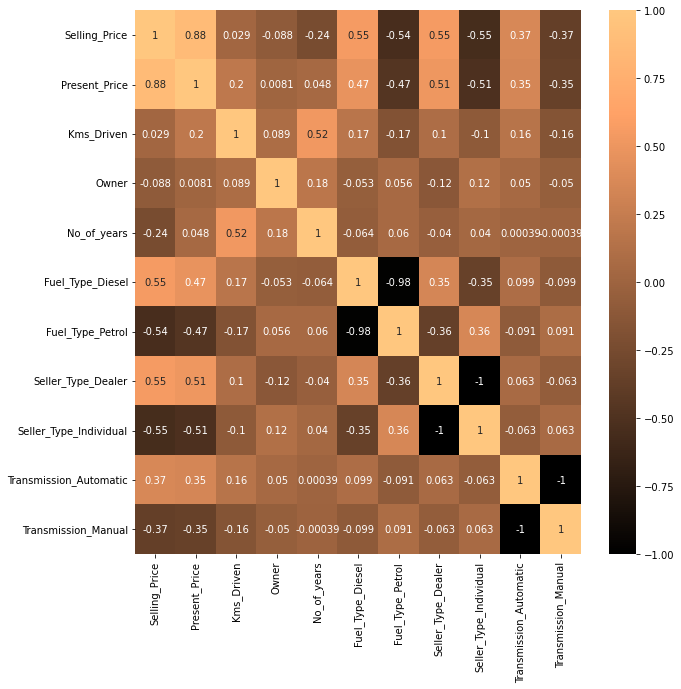

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='copper')

Observation: We can clearly estimate that Selling Price is least dependent on Km Driven or Owner Type. 

# Selecting Features and Target

In [102]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [103]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,8,0,1,1,0,0,1
1,9.54,43000,0,9,1,0,1,0,0,1
2,9.85,6900,0,5,0,1,1,0,0,1
3,4.15,5200,0,11,0,1,1,0,0,1
4,6.87,42450,0,8,1,0,1,0,0,1


In [104]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

# Feature Selection

In [105]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [106]:
model.feature_importances_

array([0.36007343, 0.03975256, 0.00045519, 0.07380165, 0.237033  ,
       0.01281985, 0.12316201, 0.00255061, 0.06908922, 0.08126248])

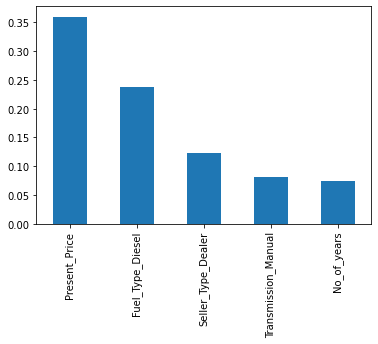

In [107]:
imp_feature= pd.Series(model.feature_importances_, index=X.columns)
imp_feature.nlargest(5).plot(kind="bar")
plt.show()

Obseravation: Selling Price is dependent on these Five features the most

# Training and Testing Data

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state = 4)

In [109]:
len(X_train)

255

# Choosing the Model

In [111]:
model = RandomForestRegressor()

In [113]:
#Hyperparameter Tuning
n_estimators = [int(x) for x in np.linspace(start = 100,stop= 1400, num = 12)]

# No. of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 36, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100,105]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 14]

In [114]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 218, 336, 454, 572, 690, 809, 927, 1045, 1163, 1281, 1400], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 11, 17, 23, 29, 36], 'min_samples_split': [2, 5, 10, 15, 100, 105], 'min_samples_leaf': [1, 2, 5, 10, 14]}


In [116]:
rf_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid,
                               scoring = 'neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5,
                               verbose = 3, 
                               random_state = 45, 
                               n_jobs = 1)

# Training the Model

In [117]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=36, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=572;, score=-4.077 total time=   1.5s
[CV 2/5] END max_depth=36, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=572;, score=-1.050 total time=   0.9s
[CV 3/5] END max_depth=36, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=572;, score=-5.855 total time=   0.9s
[CV 4/5] END max_depth=36, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=572;, score=-5.922 total time=   0.9s
[CV 5/5] END max_depth=36, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=572;, score=-0.642 total time=   0.9s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=927;, score=-4.723 total time=   1.3s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=927;, score=-

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 36],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 14],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              105],
                                        'n_estimators': [100, 218, 336, 454,
                                                         572, 690, 809, 927,
                                                         1045, 1163, 1281,
                                                         1400]},
                   random_state=45, scoring='neg_mean_squared_error',
                   verbose=3)

In [118]:
#best params
rf_random.best_params_

{'max_depth': 36,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 572}

# Testing the Model

In [119]:
predicted_y_values = rf_random.predict(X_test)

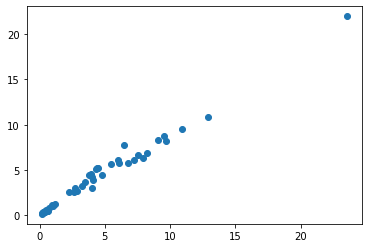

In [120]:
plt.scatter(y_test, predicted_y_values)

In [123]:
pred=pd.DataFrame({'Actual':y_test,'Predict':predicted_y_values})

In [124]:
pred.head()

,Actual,Predict
294,3.75,4.500974
208,7.90,6.336339
18,3.25,3.235333
43,5.50,5.654601
241,4.75,4.504302


# Accuracy 

In [125]:
acc= r2_score(y_test, predicted_y_values)
acc

0.9707629152101777